# DSA312 Project Part 1 Submission Group X

MEMBERS:

ABDULLAH KHURSHID, abdullahk.2020, G1

MATTIA BOELLENRUECHER, mattia.b.2024, G1

MUHAMMAD KAREEM BIN ABDUL GHANI, muhammadag.2022, G1

SYED MUHAMMAD FIRAS BIN SYED SIRAJ UDDIN, muhammadsu.2021, G1

YIP YU LIANG ADRIAN, adrian.yip.2022, G1

# Loading Python Libraries

In [2]:
#load neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

# Data Cleaning for Survey Data

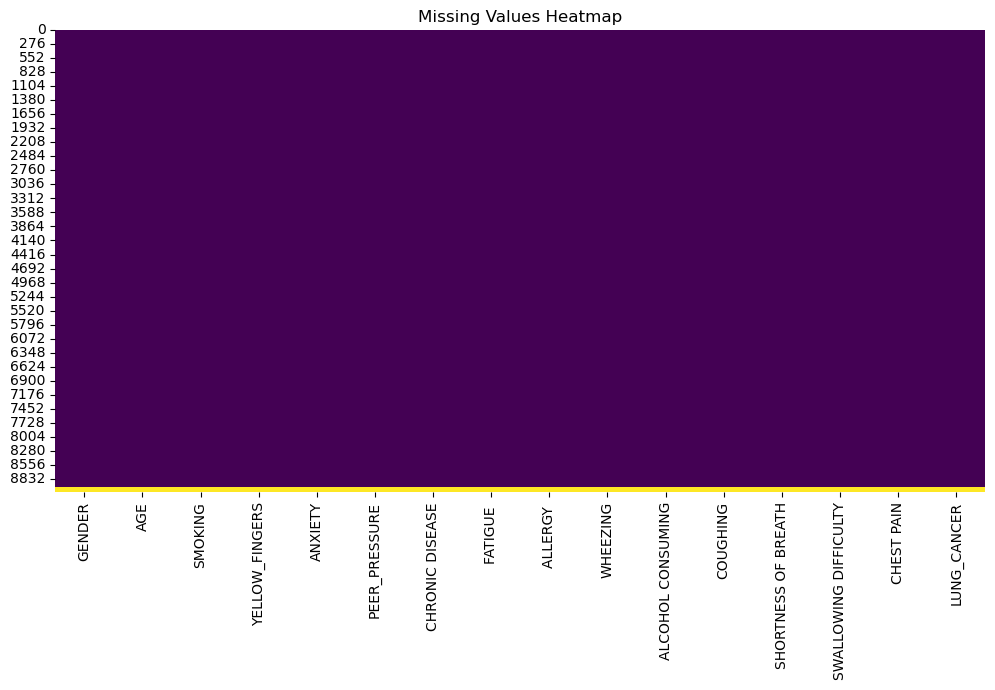

In [4]:
#loading the given dataset from Ministry of Health survey
MOH_data = pd.read_csv('lung cancer survey.csv')

#it was observed there are a series of rows where there are missing values across all columns at the bottom of the dataframe
plt.figure(figsize=(12, 6))
sns.heatmap(MOH_data.isna(), cbar=False, cmap='viridis')  # 'viridis' is the color map
plt.title("Missing Values Heatmap")
plt.show()

#removing rows with missing values
MOH_data = MOH_data.dropna()

#removed underscores from column names to standardised 
MOH_data.columns = MOH_data.columns.str.replace('_', ' ')

# Code for Figure 1

/var/folders/lj/ycd55y892nd6ytg1py0yln8m0000gn/T/ipykernel_62080/3007967710.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(male_incidence_data['Cancer Type'], rotation=45, ha='right')
/var/folders/lj/ycd55y892nd6ytg1py0yln8m0000gn/T/ipykernel_62080/3007967710.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(female_incidence_data['Cancer Type'], rotation=45, ha='right')


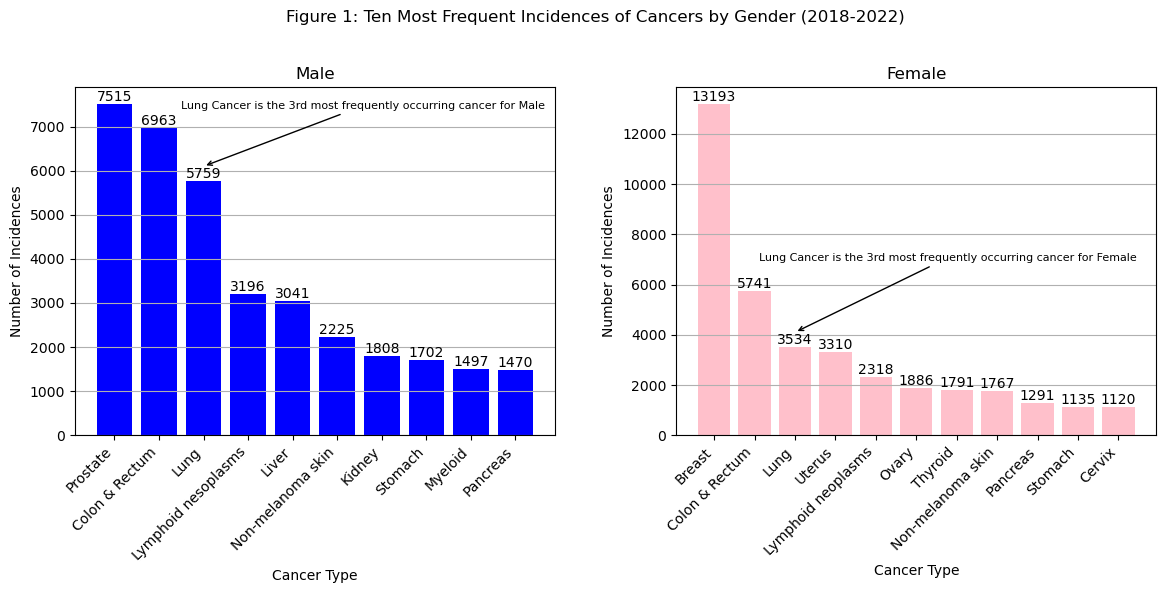

In [8]:
#Loading dataset from Singapore Cancer Registry Annual Report 2022 and selecting the sheet for cancer incidence as a pandas dataframe
cancer_incidence = pd.read_excel('National Cancer Registry 2022.xlsx', sheet_name='Table 1.1.2 (Incidence)')

# Filter data for Male and Female
male_incidence_data = cancer_incidence[cancer_incidence['Gender'] == 'Male']
female_incidence_data = cancer_incidence[cancer_incidence['Gender'] == 'Female']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Male
bars_male = axs[0].bar(male_incidence_data['Cancer Type'], male_incidence_data['Count'], color='blue')
axs[0].set_title('Male')
axs[0].set_ylabel('Number of Incidences')
axs[0].set_xlabel('Cancer Type')
axs[0].set_xticklabels(male_incidence_data['Cancer Type'], rotation=45, ha='right')

# Add count values on top of bars for Male
for bar in bars_male:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                f'{int(bar.get_height())}', ha='center', va='bottom')

# Plot for Female
bars_female = axs[1].bar(female_incidence_data['Cancer Type'], female_incidence_data['Count'], color='pink')
axs[1].set_title('Female')
axs[1].set_ylabel('Number of Incidences')
axs[1].set_xlabel('Cancer Type')
axs[1].set_xticklabels(female_incidence_data['Cancer Type'], rotation=45, ha='right')

# Add count values on top of bars for Female
for bar in bars_female:
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                f'{int(bar.get_height())}', ha='center', va='bottom')

# Annotate Lung Cancer columns
axs[0].annotate('Lung Cancer is the 3rd most frequently occurring cancer for Male',
                xy=('Lung', 6100), xytext=(+115, +40), textcoords='offset points',
                ha='center', va='bottom', fontsize=8, 
                arrowprops=dict(arrowstyle='->', color='black'))

axs[1].annotate('Lung Cancer is the 3rd most frequently occurring cancer for Female',
                xy=('Lung', 4100), xytext=(+110, +50), textcoords='offset points',
                ha='center', va='bottom', fontsize=8, 
                arrowprops=dict(arrowstyle='->', color='black'))

# Set the overall title
plt.suptitle("Figure 1: Ten Most Frequent Incidences of Cancers by Gender (2018-2022)")

# Add gridlines
axs[0].yaxis.grid(True)
axs[1].yaxis.grid(True)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the suptitle
plt.show()

# Code for Figure 2

/var/folders/lj/ycd55y892nd6ytg1py0yln8m0000gn/T/ipykernel_62080/2736527906.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(male_mortality_data['Cancer Type'], rotation=45, ha='right')
/var/folders/lj/ycd55y892nd6ytg1py0yln8m0000gn/T/ipykernel_62080/2736527906.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(female_mortality_data['Cancer Type'], rotation=45, ha='right')


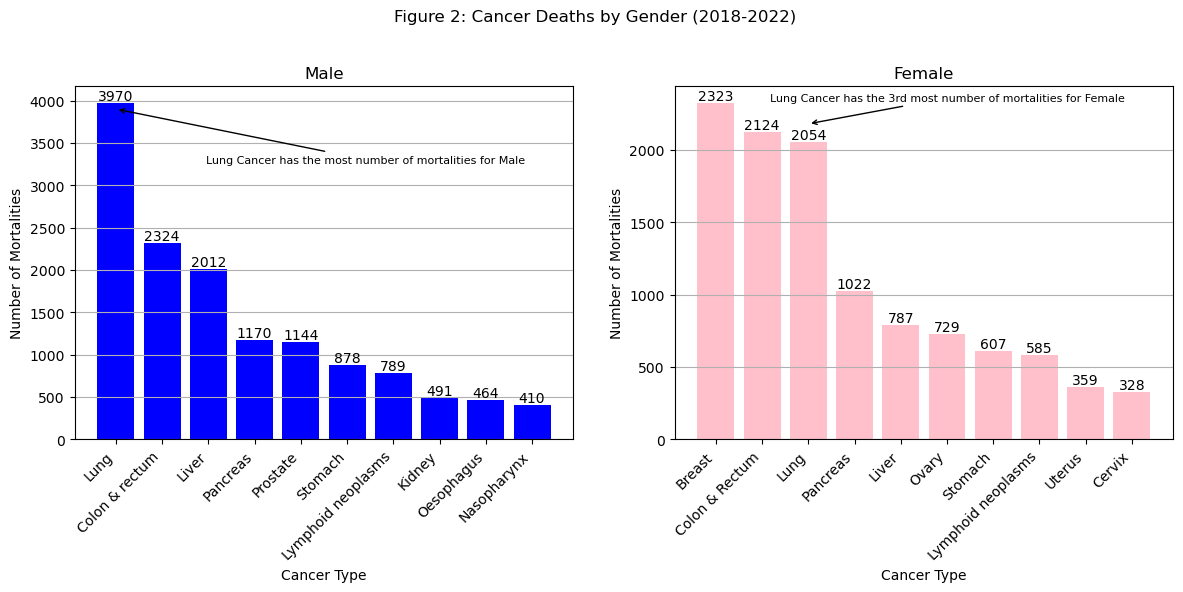

In [11]:
# Load the dataset for cancer mortality from the Singapore Cancer Registry Annual Report 2022
cancer_mortality = pd.read_excel('National Cancer Registry 2022.xlsx', sheet_name='Table 1.1.2 (Mortality)')

# Filter data for Male and Female
male_mortality_data = cancer_mortality[cancer_mortality['Gender'] == 'Male']
female_mortality_data = cancer_mortality[cancer_mortality['Gender'] == 'Female']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Male
bars_male = axs[0].bar(male_mortality_data['Cancer Type'], male_mortality_data['Count'], color='blue')
axs[0].set_title('Male')
axs[0].set_ylabel('Number of Mortalities')
axs[0].set_xlabel('Cancer Type')
axs[0].set_xticklabels(male_mortality_data['Cancer Type'], rotation=45, ha='right')

# Add count values on top of bars for Male
for bar in bars_male:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                f'{int(bar.get_height())}', ha='center', va='bottom')

# Plot for Female
bars_female = axs[1].bar(female_mortality_data['Cancer Type'], female_mortality_data['Count'], color='pink')
axs[1].set_title('Female')
axs[1].set_ylabel('Number of Mortalities')
axs[1].set_xlabel('Cancer Type')
axs[1].set_xticklabels(female_mortality_data['Cancer Type'], rotation=45, ha='right')

# Add count values on top of bars for Female
for bar in bars_female:
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                f'{int(bar.get_height())}', ha='center', va='bottom')

# Annotate column for Lung Cancer
axs[0].annotate(f'Lung Cancer has the most number of mortalities for Male',
                xy=('Lung', 3900), xytext=(+180, -40), textcoords='offset points',
                ha='center', va='bottom', fontsize=8,
                arrowprops=dict(arrowstyle='->', color='black'))

axs[1].annotate(f'Lung Cancer has the 3rd most number of mortalities for Female',
                xy=('Lung', 2180), xytext=(+100, +15), textcoords='offset points',
                ha='center', va='bottom', fontsize=8,
                arrowprops=dict(arrowstyle='->', color='black'))

# Set the overall title
plt.suptitle("Figure 2: Cancer Deaths by Gender (2018-2022)")

# Add gridlines
axs[0].yaxis.grid(True)
axs[1].yaxis.grid(True)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the suptitle
plt.show()

# Code for Figure 3

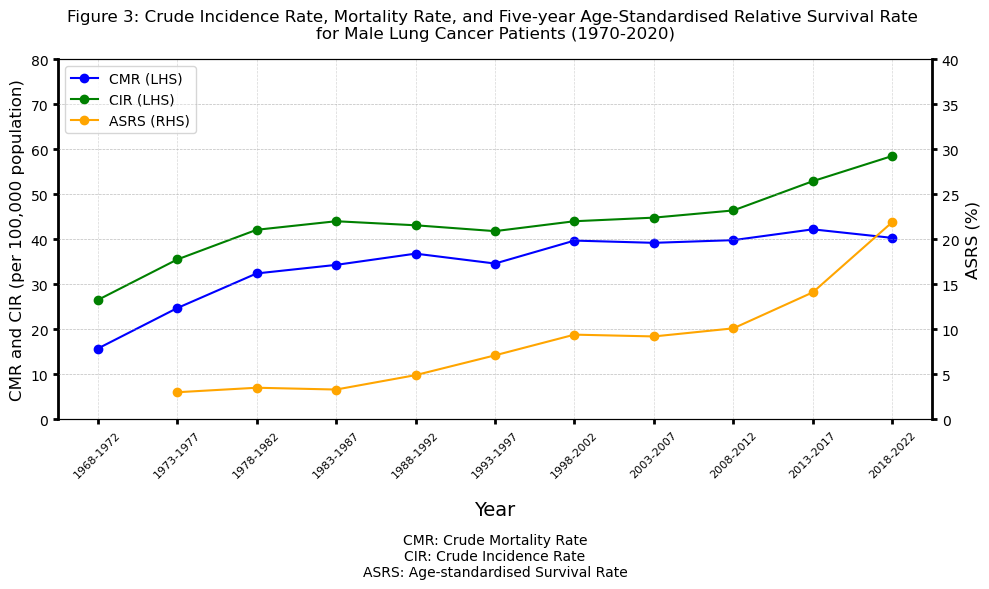

In [14]:
#loading dataset from Singapore Cancer Registry Annual Report 2022 and selecting the sheet for cancer incidence as a pandas dataframe
male_incidence_mortality_overtime = pd.read_excel('National Cancer Registry 2022.xlsx', sheet_name='Table 3.1.1 (Lung Cancer)')

# Remove brackets and asterisks from column names
male_incidence_mortality_overtime.columns = (
    male_incidence_mortality_overtime.columns
    .str.replace(r'\s*\(.*?\)\*?', '', regex=True)  # Remove brackets and asterisks
    .str.strip()  # Remove leading/trailing whitespace
)

# Function to clean specific columns' values
def clean_values(column):
    return column.str.extract(r'(\d+\.\d+)')[0].astype(float)  # Extract numeric values

# Clean values in the specific columns
male_incidence_mortality_overtime['CIR'] = clean_values(male_incidence_mortality_overtime['CIR'])
male_incidence_mortality_overtime['CMR'] = clean_values(male_incidence_mortality_overtime['CMR'])
male_incidence_mortality_overtime['ASRS'] = clean_values(male_incidence_mortality_overtime['ASRS'])

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot CMR and CIR on the left y-axis
ax1.plot(male_incidence_mortality_overtime['Year'], male_incidence_mortality_overtime['CMR'], 
         color='blue', marker='o', label='CMR (LHS)')
ax1.plot(male_incidence_mortality_overtime['Year'], male_incidence_mortality_overtime['CIR'], 
         color='green', marker='o', label='CIR (LHS)')
ax1.set_xlabel("Year", fontsize=14, labelpad = 15) #change made here to increase gap from xlabel 
ax1.set_ylabel("CMR and CIR (per 100,000 population)", fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.tick_params(direction='out', width=2)
ax1.set_ylim(0,80)

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45, fontsize = 8) #fontsize edited


# Create a second y-axis for ASRS
ax2 = ax1.twinx()
ax2.plot(male_incidence_mortality_overtime['Year'], male_incidence_mortality_overtime['ASRS'], 
         color='orange', marker='o', label='ASRS (RHS)')
ax2.set_ylabel("ASRS (%)", fontsize=12)
ax2.tick_params(axis='y', labelcolor='black')
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('black')
ax2.tick_params(direction='out', width=2)
ax2.set_ylim(0,40)

# Add Gridlines
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
ax2.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Title and Legend
ax1.set_title("Figure 3: Crude Incidence Rate, Mortality Rate, and Five-year Age-Standardised Relative Survival Rate \nfor Male Lung Cancer Patients (1970-2020)",
            pad = 15, fontsize = 12) #change made here to max labelling easier 

# Combine legends from both axes in the top left corner
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')


# Add text annotation at the bottom
plt.figtext(0.5, 0.03, "CMR: Crude Mortality Rate\nCIR: Crude Incidence Rate\nASRS: Age-standardised Survival Rate", 
             ha='center', fontsize=10)

# Adjust layout to make room for the text
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit text

# Show the plot
plt.show()

# Code for Figure 4

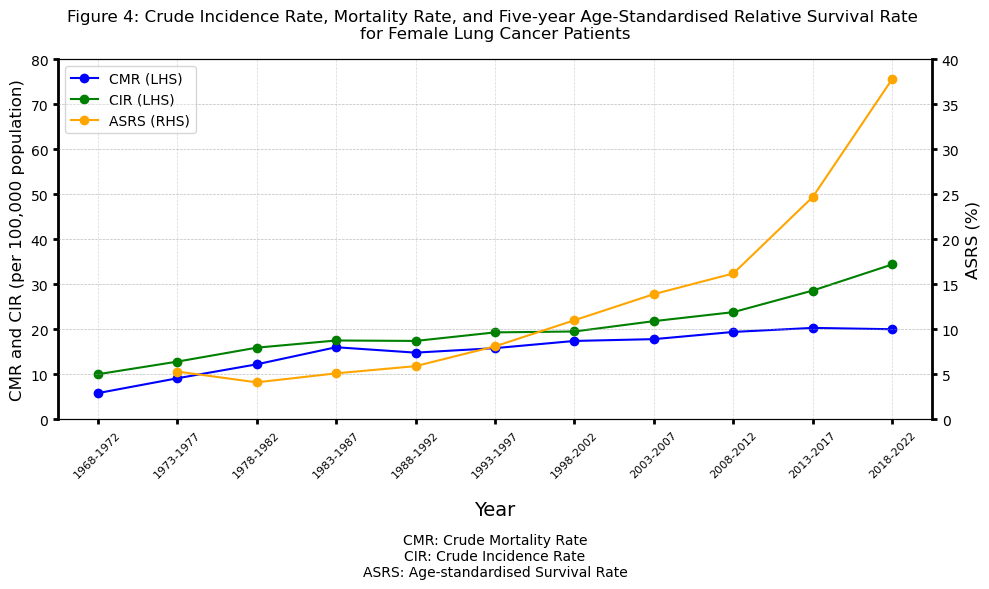

In [17]:
#loading dataset from Singapore Cancer Registry Annual Report 2022 and selecting the sheet for cancer incidence as a pandas dataframe
female_incidence_mortality_overtime = pd.read_excel('National Cancer Registry 2022.xlsx', sheet_name='Table 3.1.2 (Lung Cancer)')

# Remove brackets and asterisks from column names
female_incidence_mortality_overtime.columns = (
    male_incidence_mortality_overtime.columns
    .str.replace(r'\s*\(.*?\)\*?', '', regex=True)  # Remove brackets and asterisks
    .str.strip()  # Remove leading/trailing whitespace
)

# Function to clean specific columns' values
def clean_values(column):
    return column.str.extract(r'(\d+\.\d+)')[0].astype(float)  # Extract numeric values

# Clean values in the specific columns
female_incidence_mortality_overtime['CIR'] = clean_values(female_incidence_mortality_overtime['CIR'])
female_incidence_mortality_overtime['CMR'] = clean_values(female_incidence_mortality_overtime['CMR'])
female_incidence_mortality_overtime['ASRS'] = clean_values(female_incidence_mortality_overtime['ASRS'])

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot CMR and CIR on the left y-axis
ax1.plot(female_incidence_mortality_overtime['Year'], female_incidence_mortality_overtime['CMR'], 
         color='blue', marker='o', label='CMR (LHS)')
ax1.plot(female_incidence_mortality_overtime['Year'], female_incidence_mortality_overtime['CIR'], 
         color='green', marker='o', label='CIR (LHS)')
ax1.set_xlabel("Year", fontsize=14, labelpad = 15) #change made here to increase gap from xlabel 
ax1.set_ylabel("CMR and CIR (per 100,000 population)", fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.tick_params(direction='out', width=2)
ax1.set_ylim(0,80)

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45, fontsize = 8) #fontsize edited

# Create a second y-axis for ASRS
ax2 = ax1.twinx()
ax2.plot(female_incidence_mortality_overtime['Year'], female_incidence_mortality_overtime['ASRS'], 
         color='orange', marker='o', label='ASRS (RHS)')
ax2.set_ylabel("ASRS (%)", fontsize=12)
ax2.tick_params(axis='y', labelcolor='black')
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('black')
ax2.tick_params(direction='out', width=2)
ax2.set_ylim(0,40)

# Add Gridlines
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
ax2.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Title and Legend
ax1.set_title("Figure 4: Crude Incidence Rate, Mortality Rate, and Five-year Age-Standardised Relative Survival Rate \nfor Female Lung Cancer Patients",
             pad = 15, fontsize = 12)

# Combine legends from both axes in the top left corner
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Add text annotation at the bottom
plt.figtext(0.5, 0.03, "CMR: Crude Mortality Rate\nCIR: Crude Incidence Rate\nASRS: Age-standardised Survival Rate", 
             ha='center', fontsize=10)

# Adjust layout to make room for the text
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit text

# Show the plot
plt.show()

# Code for Figure 5

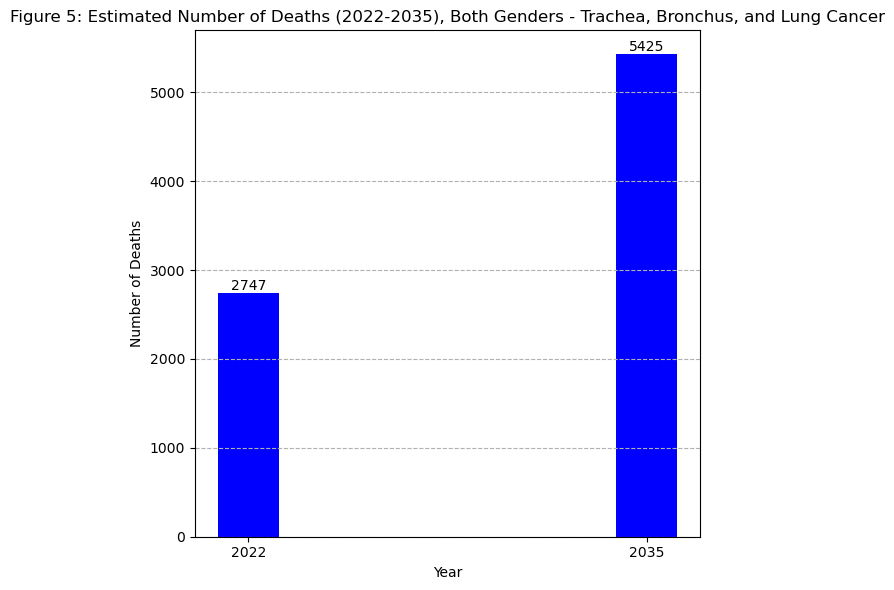

In [20]:
# Load the dataset
mortality_prediction = pd.read_excel('WHO - Cancer Mortality and Incidence Prediction.xlsx', sheet_name='Table 1 (Mortality Prediction)')

# Prepare data for plotting
years = mortality_prediction['Year']
predictions = mortality_prediction['Prediction Mortality']

# Create the bar chart with wider bars and values at the top
plt.figure(figsize=(6, 6))
bars = plt.bar(years, predictions, color='blue', width=2)

# Add the values at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Customize the chart
plt.title('Figure 5: Estimated Number of Deaths (2022-2035), Both Genders - Trachea, Bronchus, and Lung Cancer')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(years)  # Show all years on x-axis
plt.grid(axis='y', linestyle='--', alpha=1)

# Show the updated plot
plt.tight_layout()
plt.show()

# Code for Figure 6

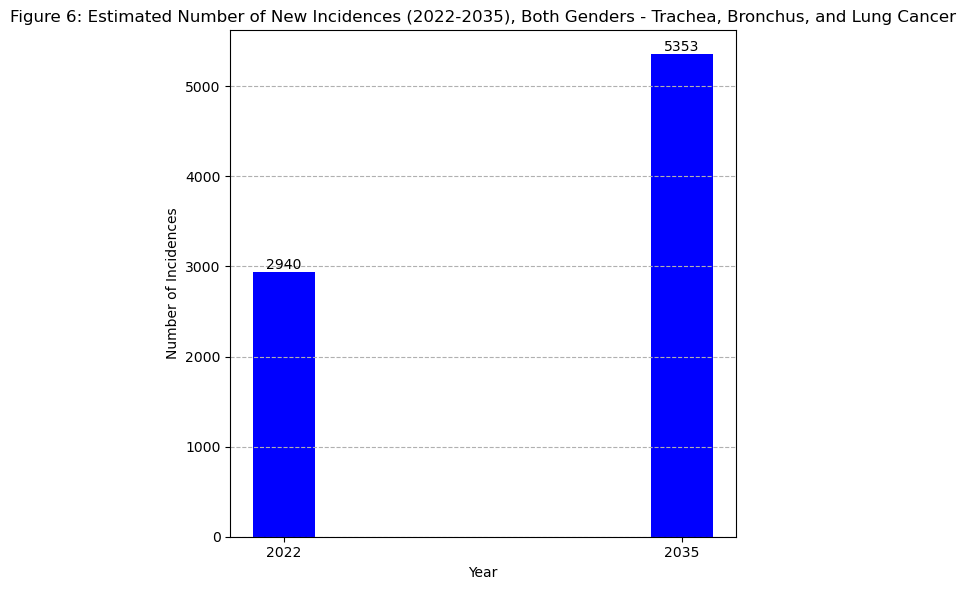

In [23]:
# Load the dataset
mortality_prediction = pd.read_excel('WHO - Cancer Mortality and Incidence Prediction.xlsx', sheet_name='Table 2 (Incidence Prediction)')

# Prepare data for plotting
years = mortality_prediction['Year']
predictions = mortality_prediction['Prediction Incidence']

# Create the bar chart with wider bars and values at the top
plt.figure(figsize=(6, 6))
bars = plt.bar(years, predictions, color='blue', width=2)

# Add the values at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Customize the chart
plt.title('Figure 6: Estimated Number of New Incidences (2022-2035), Both Genders - Trachea, Bronchus, and Lung Cancer')
plt.xlabel('Year')
plt.ylabel('Number of Incidences')
plt.xticks(years)  # Show all years on x-axis
plt.grid(axis='y', linestyle='--', alpha=1)

# Show the updated plot
plt.tight_layout()
plt.show()

# Code for Figure 7

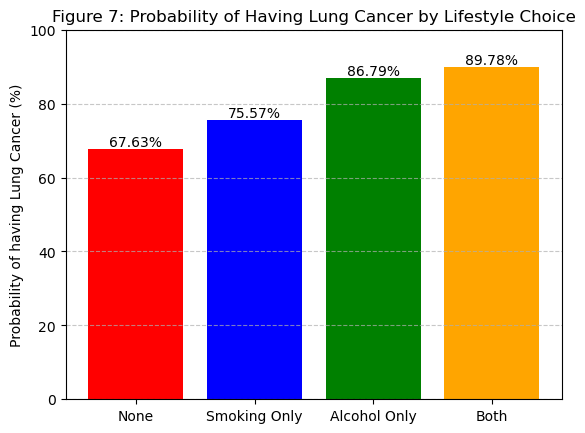

Chi-Square Statistic: 437.3603
P-value: 0.0000
The distribution of lung cancer across the four groups is statistically significant (p < 0.05).


In [26]:
# Calculate the counts and proportions for each group
smoking_only = MOH_data[(MOH_data['SMOKING'] == 1) & (MOH_data['ALCOHOL CONSUMING'] == 0)]['LUNG CANCER'].mean()
alcohol_only = MOH_data[(MOH_data['SMOKING'] == 0) & (MOH_data['ALCOHOL CONSUMING'] == 1)]['LUNG CANCER'].mean()
both = MOH_data[(MOH_data['SMOKING'] == 1) & (MOH_data['ALCOHOL CONSUMING'] == 1)]['LUNG CANCER'].mean()
none = MOH_data[(MOH_data['SMOKING'] == 0) & (MOH_data['ALCOHOL CONSUMING'] == 0)]['LUNG CANCER'].mean()

# Prepare data for the bar chart and convert proportions to percentages
groups = ['Smoking Only', 'Alcohol Only', 'Both', 'None']
proportions = [smoking_only * 100, alcohol_only * 100, both * 100, none * 100]  # Convert to percentages

# Create a DataFrame to sort the data
data = pd.DataFrame({'Group': groups, 'Proportion': proportions})
data = data.sort_values(by='Proportion')  # Sort in ascending order

# Create the bar chart with different colors
colors = ['red', 'blue', 'green', 'orange']
bars = plt.bar(data['Group'], data['Proportion'], color=colors)

# Add percentage labels on top of the bars
for i, proportion in enumerate(data['Proportion']):
    plt.text(i, proportion, f'{proportion:.2f}%', ha='center', va='bottom')

# Set chart labels and title
plt.ylabel('Probability of having Lung Cancer (%)')
plt.title('Figure 7: Probability of Having Lung Cancer by Lifestyle Choice')

# Add gridlines and set the upper limit for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100)

# Show the plot
plt.show()

#######

# Check using Chi-Square Test to see if the values are significant:
# Create a contingency table for the four lifestyle groups and lung cancer
# Calculate the counts for each category (Lung Cancer: 0 or 1)
smoking_only_counts = MOH_data[(MOH_data['SMOKING'] == 1) & (MOH_data['ALCOHOL CONSUMING'] == 0)]['LUNG CANCER'].value_counts()
alcohol_only_counts = MOH_data[(MOH_data['SMOKING'] == 0) & (MOH_data['ALCOHOL CONSUMING'] == 1)]['LUNG CANCER'].value_counts()
both_counts = MOH_data[(MOH_data['SMOKING'] == 1) & (MOH_data['ALCOHOL CONSUMING'] == 1)]['LUNG CANCER'].value_counts()
none_counts = MOH_data[(MOH_data['SMOKING'] == 0) & (MOH_data['ALCOHOL CONSUMING'] == 0)]['LUNG CANCER'].value_counts()

# Ensure all categories have both '0' and '1' counts
smoking_only = [smoking_only_counts.get(0, 0), smoking_only_counts.get(1, 0)]
alcohol_only = [alcohol_only_counts.get(0, 0), alcohol_only_counts.get(1, 0)]
both = [both_counts.get(0, 0), both_counts.get(1, 0)]
none = [none_counts.get(0, 0), none_counts.get(1, 0)]

# Create the contingency table
contingency_table = pd.DataFrame([smoking_only, alcohol_only, both, none],
                                 index=['Smoking Only', 'Alcohol Only', 'Both', 'None'],
                                 columns=['No Lung Cancer', 'Lung Cancer'])

# Apply Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print Chi-Square Test results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Check for significance
if p < 0.05:
    print("The distribution of lung cancer across the four groups is statistically significant (p < 0.05).")
else:
    print("The distribution of lung cancer across the four groups is not statistically significant (p >= 0.05).")

# Code for Figure 8

/var/folders/lj/ycd55y892nd6ytg1py0yln8m0000gn/T/ipykernel_62080/3781369196.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(tick * 100)}' for tick in yticks])  # Multiply by 100


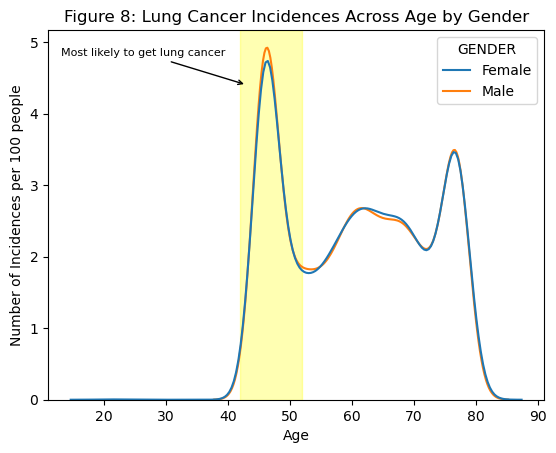

In [29]:
# Map the GENDER values to 'Male' and 'Female'
MOH_data['GENDER'] = MOH_data['GENDER'].map({0: 'Female', 1: 'Male'})

# Plot KDE for both genders, remove the fill
sns.kdeplot(data=MOH_data, x='AGE', hue='GENDER', common_norm=False, fill=False)

# Highlight age range 42 to 52 with a yellow box
plt.axvspan(42, 52, color='yellow', alpha=0.3)

#Set axis labels and titles
plt.xlabel('Age')
plt.ylabel('Number of Incidences per 100 people')  
plt.title('Figure 8: Lung Cancer Incidences Across Age by Gender')

# Modify y-axis tick labels by multiplying the values by 100
yticks = plt.gca().get_yticks()  # Get current y-tick values
plt.gca().set_yticklabels([f'{int(tick * 100)}' for tick in yticks])  # Multiply by 100

#Add plot annotations
plt.annotate(
    'Most likely to get lung cancer',  # Annotation text
    xy=(43, 0.044),  # Point where the annotation will be placed
    xytext=(13, 0.048),  # Position of the text
    arrowprops=dict(arrowstyle='->', color='black', lw=1.0),  # Arrow properties
    fontsize=8,
    color='black'
)

# Show the plot
plt.show()

# Code for Figure 9

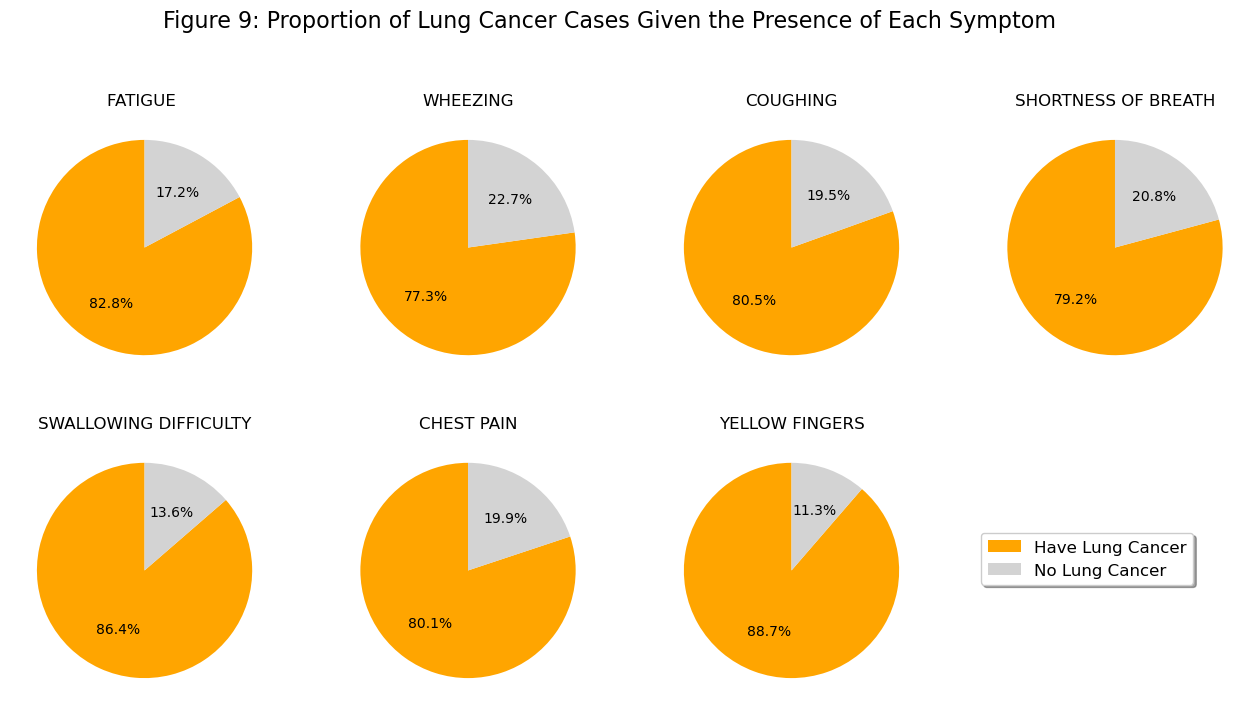

                       z_statistic       p_value
FATIGUE                   8.089705  5.980961e-16
WHEEZING                 -7.629796  2.351257e-14
COUGHING                 -0.045547  9.636711e-01
SHORTNESS OF BREATH      -4.748922  2.045038e-06
SWALLOWING DIFFICULTY    10.258853  1.079821e-24
CHEST PAIN               -1.220603  2.222363e-01
YELLOW FINGERS           20.652854  9.202060e-95


In [32]:
# List of symptoms
symptoms = ['FATIGUE ', 'WHEEZING', 'COUGHING', 
            'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 
            'CHEST PAIN', 'YELLOW FINGERS']

# Create subplots for multiple pie charts
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each symptom and create a pie chart
for i, symptom in enumerate(symptoms):
    # Calculate the proportion of lung cancer for each symptom (mean for binary 0/1)
    lung_cancer_proportion = MOH_data[MOH_data[symptom] == 1]['LUNG CANCER'].mean()
    
    # Proportion for pie chart
    proportions = [lung_cancer_proportion, 1 - lung_cancer_proportion]
    
    # Create the pie chart without labels on the pie itself
    axes[i].pie(proportions, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightgrey'])
    
    # Title for each pie chart
    axes[i].set_title(f'{symptom}')

# Add the main title
plt.suptitle('Figure 9: Proportion of Lung Cancer Cases Given the Presence of Each Symptom', fontsize=16)

# Adjust layout to prevent overlap and raise the title
plt.subplots_adjust(top=0.85)  # Shift the title higher

# Create a custom legend and shift it slightly to the left
fig.legend(['Have Lung Cancer', 'No Lung Cancer'], loc='lower right', fontsize=12, markerscale=1.5, 
           bbox_to_anchor=(0.87, 0.25), fancybox=True, shadow=True)

# Remove the last subplot (the empty one)
axes[-1].axis('off')  # Hide the last subplot

# Show the pie charts
plt.show()

# Initialize a dictionary to hold results
ztest_results = {}

# Loop through each symptom to perform Two-Proportion Z-Test
for symptom in symptoms:
    # Calculate counts of lung cancer cases with and without the symptom
    count_with_symptom = MOH_data[(MOH_data[symptom] == 1) & (MOH_data['LUNG CANCER'] == 1)].shape[0]
    count_without_symptom = MOH_data[(MOH_data[symptom] == 0) & (MOH_data['LUNG CANCER'] == 1)].shape[0]
    
    # Total counts of individuals with and without the symptom
    total_with_symptom = MOH_data[MOH_data[symptom] == 1].shape[0]
    total_without_symptom = MOH_data[MOH_data[symptom] == 0].shape[0]
    
    # Perform the Z-test
    count = [count_with_symptom, count_without_symptom]
    nobs = [total_with_symptom, total_without_symptom]
    
    z_stat, p_value = proportions_ztest(count, nobs)
    
    # Store results
    ztest_results[symptom] = {
        'z_statistic': z_stat,
        'p_value': p_value
    }

# Convert results to DataFrame for easy viewing
ztest_results_df = pd.DataFrame(ztest_results).T

# Display the results
print(ztest_results_df)

# Code for Figure 10

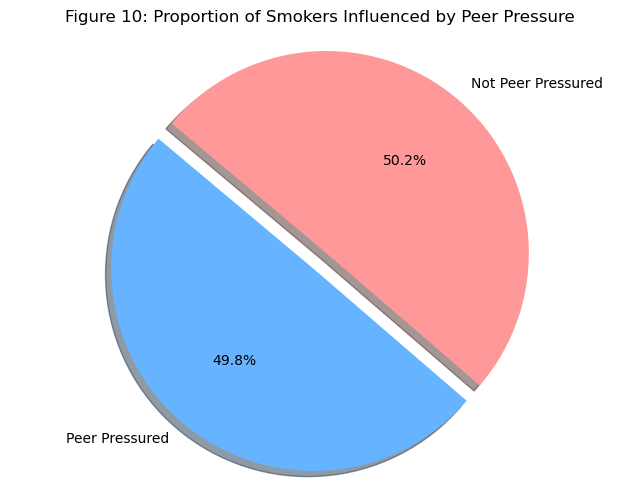

In [35]:
# Filter data for smokers and calculate the counts of peer pressure
smokers = MOH_data[MOH_data['SMOKING'] == 1]
peer_pressure_counts = smokers['PEER PRESSURE'].value_counts()


# Create labels for the pie chart
labels = ['Peer Pressured', 'Not Peer Pressured']
sizes = [peer_pressure_counts[1], peer_pressure_counts[0]]  # Count of '1' (peer pressured) and '0' (not peer pressured)
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # "explode" the first slice (Peer Pressured)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Figure 10: Proportion of Smokers Influenced by Peer Pressure')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [37]:
# Calculate the counts for each category
anxiety_smoker_count = len(MOH_data[(MOH_data['ANXIETY'] == 1) & (MOH_data['SMOKING'] == 1)])
peer_pressure_smoker_count = len(MOH_data[(MOH_data['PEER PRESSURE'] == 1) & (MOH_data['SMOKING'] == 1)])
anxiety_alcohol_count = len(MOH_data[(MOH_data['ANXIETY'] == 1) & (MOH_data['ALCOHOL CONSUMING'] == 1)])

# Total counts of smokers and alcohol consumers
smoker_count = len(MOH_data[MOH_data['SMOKING'] == 1])
alcohol_count = len(MOH_data[MOH_data['ALCOHOL CONSUMING'] == 1])

# Calculate the probabilities
anxious_given_smoker = anxiety_smoker_count / smoker_count
peer_pressure_given_smoker = peer_pressure_smoker_count / smoker_count
anxiety_given_alcohol = anxiety_alcohol_count / alcohol_count

# Creating Contingency Tables for the Chi-Square Test
contingency_anxiety_smoking = pd.crosstab(MOH_data['ANXIETY'], MOH_data['SMOKING'])
contingency_peer_pressure_smoking = pd.crosstab(MOH_data['PEER PRESSURE'], MOH_data['SMOKING'])
contingency_anxiety_alcohol = pd.crosstab(MOH_data['ANXIETY'], MOH_data['ALCOHOL CONSUMING'])

chi2_anxiety_smoking, p_anxiety_smoking, _, _ = chi2_contingency(contingency_anxiety_smoking)
chi2_peer_pressure_smoking, p_peer_pressure_smoking, _, _ = chi2_contingency(contingency_peer_pressure_smoking)
chi2_anxiety_alcohol, p_anxiety_alcohol, _, _ = chi2_contingency(contingency_anxiety_alcohol)

# Display results for Anxiety, Peer Pressure, and Alcohol
print(f"Probability of Anxiety Given Smoker: {anxious_given_smoker:.4f}, P-value: {p_anxiety_smoking:.4f}")
print(f"Probability of Peer Pressure Given Smoker: {peer_pressure_given_smoker:.4f}, P-value: {p_peer_pressure_smoking:.4f}")
print(f"Probability of Anxiety Given Alcohol Consumption: {anxiety_given_alcohol:.4f}, P-value: {p_anxiety_alcohol:.4f}")

Probability of Anxiety Given Smoker: 0.4627, P-value: 0.2109
Probability of Peer Pressure Given Smoker: 0.4979, P-value: 0.0124
Probability of Anxiety Given Alcohol Consumption: 0.4555, P-value: 0.8872


# Code for Figure 11

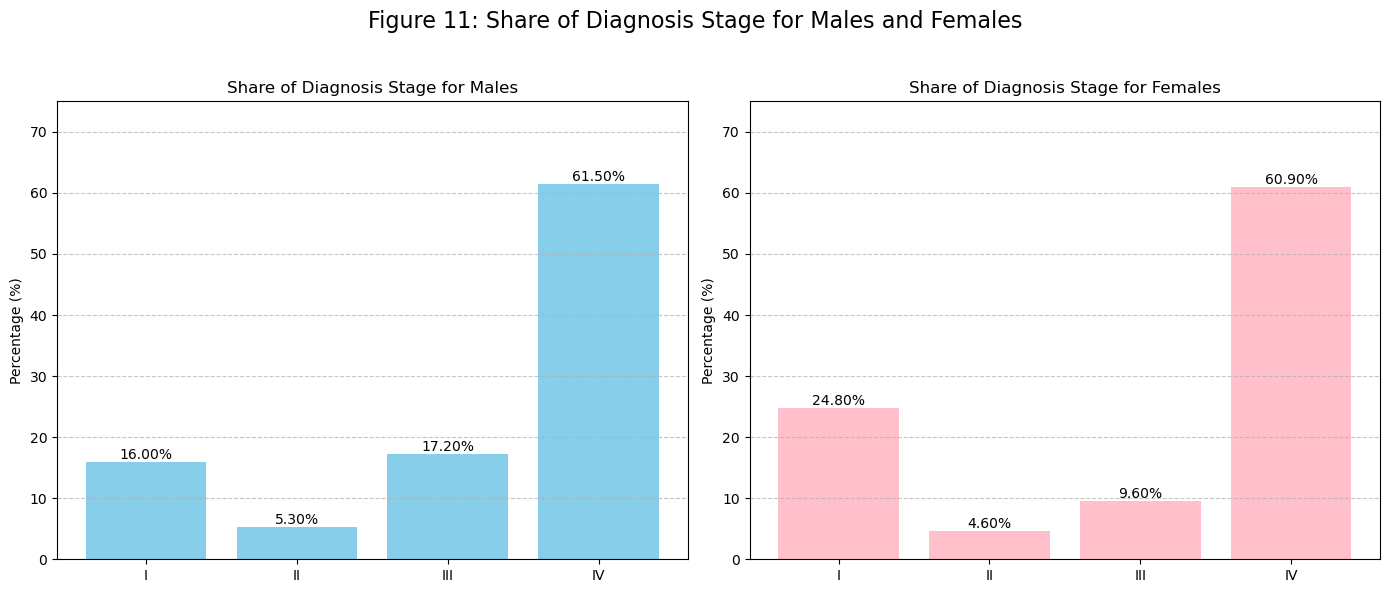

In [40]:
# Load the datasets
male_diagnosis_stage = pd.read_excel('National Cancer Registry 2022.xlsx', sheet_name='Table 3.2.1 (Lung Cancer)')
female_diagnosis_stage = pd.read_excel('National Cancer Registry 2022.xlsx', sheet_name='Table 3.2.2 (Lung Cancer)')

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for male diagnosis stage (Skyblue color)
ax1.bar(male_diagnosis_stage['Stage'], male_diagnosis_stage['Percentage (%)'], color='skyblue')
for i, percentage in enumerate(male_diagnosis_stage['Percentage (%)']):
    ax1.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Share of Diagnosis Stage for Males')
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0, 75)

# Bar chart for female diagnosis stage (Pink color)
ax2.bar(female_diagnosis_stage['Stage'], female_diagnosis_stage['Percentage (%)'], color='pink')
for i, percentage in enumerate(female_diagnosis_stage['Percentage (%)']):
    ax2.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Share of Diagnosis Stage for Females')
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, 75)

# Add a unified figure title
fig.suptitle('Figure 11: Share of Diagnosis Stage for Males and Females', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the suptitle

# Show the combined plot
plt.show()